In [1]:
import numpy as np # 数组操作
import pandas as pd #文件操作
import datetime
import time

In [2]:
data = pd.read_excel('C:/Users/admin/Desktop/供水量预测/总供水量预测/input3.xlsx')  

In [3]:
import seaborn as sns  
import matplotlib.pyplot as plt   
# visualize the relationship between the features and the response using scatterplots  
sns.pairplot(data, x_vars=['星期','月份','四季','最高气温','最低气温','平均气温','温度等级','天气','转天气','风向','风力','空气质量指数','程度','节假日','宝山压力','沪北压力'
                          ,'沪东压力','闵行压力','青东压力','市南压力','松北压力','长桥压力','闵行水厂一期压力','闵行水厂二期压力','闵行水厂三期压力','闵行水厂四期压力','罗泾水厂压力','市南水厂压力'
                          ,'泰和水厂一厂压力','泰和水厂二厂压力','泰和水厂三厂压力','徐泾水厂压力','吴淞水厂压力','杨树浦水厂压力','闸北水厂压力','长桥水厂压力'], y_vars='总供水量', size=6, aspect=2 ) 
plt.show()#注意必须加上这一句，否则无法显示。  

In [4]:
y = data.pop('总供水量') #将y值取出
from sklearn.preprocessing import LabelEncoder # 转化为数字
data = pd.get_dummies(data)

In [5]:
#create a python list of feature names  
feature_cols = ['最高气温','最低气温','平均气温','宝山压力','沪北压力' ,'沪东压力','闵行压力','青东压力','市南压力','松北压力','长桥压力','闵行水厂一期压力','闵行水厂二期压力','闵行水厂三期压力','闵行水厂四期压力','罗泾水厂压力','市南水厂压力'
                 ,'泰和水厂一厂压力','泰和水厂二厂压力','泰和水厂三厂压力','徐泾水厂压力','吴淞水厂压力','杨树浦水厂压力','闸北水厂压力','长桥水厂压力','温度等级_舒适','温度等级_高温','温度等级_较高温','温度等级_较低温','温度等级_低温','空气质量指数','星期_星期一','星期_星期三','星期_星期二','星期_星期五','星期_星期六',
               '星期_星期日','月份','四季_春','四季_夏','四季_秋','四季_冬','天气_暴雨','天气_大雨','天气_多云','天气_雷阵雨','天气_晴','天气_特大暴雨','天气_小雪','天气_小雨','天气_阴',
                '天气_雨夹雪','天气_中雨','天气_阵雨','转天气_暴雨','转天气_大雨','转天气_雷阵雨','转天气_小雨','转天气_多云','转天气_晴',
               '转天气_阵雨','转天气_阴','转天气_中雨','转天气_雨夹雪','转天气_中雨','转天气_中雪','风向_东风','风向_南风','风向_北风','风向_西风',
                '风向_东南风','风向_东北风','风向_西南风','风向_西北风','风力_1-2级','风力_3-4级','风力_4-5级','风力_5-6级',
               '程度_优', '程度_良', '程度_轻度污染', '程度_重度污染', '程度_中度污染','节假日_上班','节假日_元旦','节假日_春节','节假日_清明'
         ,'节假日_劳动','节假日_端午','节假日_国庆','节假日_周末']  
# use the list to select a subset of the original DataFrame  
X = data[feature_cols]  
# equivalent command to do this in one line  
X = data[['最高气温','最低气温','平均气温','宝山压力','沪北压力' ,'沪东压力','闵行压力','青东压力','市南压力','松北压力','长桥压力','闵行水厂一期压力','闵行水厂二期压力','闵行水厂三期压力','闵行水厂四期压力','罗泾水厂压力','市南水厂压力'
                ,'泰和水厂一厂压力','泰和水厂二厂压力','泰和水厂三厂压力','徐泾水厂压力','吴淞水厂压力','杨树浦水厂压力','闸北水厂压力','长桥水厂压力','温度等级_舒适','温度等级_高温','温度等级_较高温','温度等级_较低温','温度等级_低温','空气质量指数','星期_星期一','星期_星期三','星期_星期二','星期_星期五','星期_星期六',
               '星期_星期日','月份','四季_春','四季_夏','四季_秋','四季_冬','天气_暴雨','天气_大雨','天气_多云','天气_雷阵雨','天气_晴','天气_特大暴雨','天气_小雪','天气_小雨','天气_阴',
                '天气_雨夹雪','天气_中雨','天气_阵雨','转天气_暴雨','转天气_大雨','转天气_雷阵雨','转天气_小雨','转天气_多云','转天气_晴',
               '转天气_阵雨','转天气_阴','转天气_中雨','转天气_雨夹雪','转天气_中雨','转天气_中雪','风向_东风','风向_南风','风向_北风','风向_西风',
                '风向_东南风','风向_东北风','风向_西南风','风向_西北风','风力_1-2级','风力_3-4级','风力_4-5级','风力_5-6级',
               '程度_优', '程度_良', '程度_轻度污染', '程度_重度污染', '程度_中度污染','节假日_上班','节假日_元旦','节假日_春节','节假日_清明'
         ,'节假日_劳动','节假日_端午','节假日_国庆','节假日_周末']]  
# print the first 10 rows  
print(X.head())
# check the type and shape of X  
print (type(X))  
print (X.shape)  

   最高气温  最低气温  平均气温        宝山压力        沪北压力        沪东压力        闵行压力  \
0    26    19  22.5  206.800000  182.750000  198.458333  220.382353   
1    29    21  25.0  203.115385  173.000000  192.320000  212.514286   
2    30    24  27.0  197.038462  174.523810  192.880000  229.114286   
3    31    25  28.0  195.384615  169.619048  189.076923  208.485714   
4    27    24  25.5  203.307692  175.333333  193.040000  216.371429   

         青东压力        市南压力        松北压力   ...    程度_重度污染  程度_中度污染  节假日_上班  \
0  185.285714  196.333333  224.312500   ...          0        0       1   
1  179.157895  198.500000  214.882353   ...          0        0       1   
2  184.631579  207.833333  232.352941   ...          0        0       0   
3  187.000000  197.000000  202.705882   ...          0        0       0   
4  175.315789  189.833333  221.722222   ...          0        0       1   

   节假日_元旦  节假日_春节  节假日_清明  节假日_劳动  节假日_端午  节假日_国庆  节假日_周末  
0       0       0       0       0       0       0       0  
1 

In [6]:
from sklearn.cross_validation import train_test_split  #这里是引用了交叉验证  
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)  

C:\Users\admin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  
model=linreg.fit(X_train, y_train)  
print (model ) 
print (linreg.intercept_ ) 
print (linreg.coef_  )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
3320837.1209899625
[ 5.74377534e+03  6.18875268e+03  5.96626401e+03  2.60745581e+03
  5.12775667e+02 -3.71244420e+03 -1.80634091e+03 -8.58389540e+02
  1.70159751e+01 -1.23837735e+02  1.77658225e+03 -3.00749049e+02
  2.85761775e+02  3.32948275e+02  5.04667548e+02 -7.12432158e+02
 -5.04125307e+02  2.23445114e+03  9.12172365e+02  4.06308753e+02
 -5.78095352e+01 -2.89041622e+03 -1.55949298e+02  1.97440357e+03
 -1.47259044e+02 -8.79864705e+04  3.58999346e+04  1.23277735e+04
 -2.99311515e+04  6.96899138e+04  3.13288353e+02  1.81262244e+04
 -1.02783560e+04  2.63504607e+04 -2.99265698e+02 -4.24143073e+04
 -2.74885839e+04  7.62817559e+03  2.47500790e+03  3.92571102e+04
 -1.98410233e+04 -2.18910948e+04 -1.56083749e+05 -6.36206889e+04
  7.38621198e+04 -1.61181956e+04  7.03283802e+04  6.67038365e+04
  3.69149638e+03 -4.57729972e+03  4.07354092e+04  8.75453635e+04
 -4.68904431e+04 -5.55762287e+04 -7.34042292e+04  9.3840608

In [8]:
# pair the feature names with the coefficients  
zip(feature_cols, linreg.coef_)  

In [9]:
y_pred = linreg.predict(X_test)  

In [10]:
from sklearn import metrics  
import numpy as np  
sum_mean=0  
for i in range(len(y_pred)):  
    sum_mean+=(y_pred[i]-y_test.values[i])**2  
sum_erro=np.sqrt(sum_mean/50)  
# calculate RMSE by hand  
print( "RMSE by hand:",sum_erro  )

RMSE by hand: 140677.32508720455


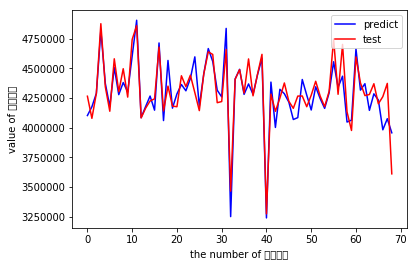

In [11]:
import matplotlib.pyplot as plt  
plt.figure()  
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")  
plt.plot(range(len(y_test)),y_test,'r',label="test")  
plt.legend(loc="upper right") #显示图中的标签  
plt.xlabel("the number of 总供水量")  
plt.ylabel('value of 总供水量') 
plt.savefig('供水量预测4.png', dpi=1500)
plt.show()  

In [12]:
model.score(X_train,y_train)

0.8786716692353881